清洗后的EDA 验证清洗是否成功 是否之前查到的问题都解决了 样本是否正常 

In [1]:
from pathlib import Path
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 160)

CLEAN_PARQUET = Path("../data/processed/training_oncourt_clean.parquet")
CLEAN_CSV     = Path("../data/processed/training_oncourt_clean.csv")
REPORT_JSON   = Path("reports/clean_preprocess/clean_report.json")

OUT_DIR = Path("reports/eda_2_clean")
OUT_DIR.mkdir(parents=True, exist_ok=True)

In [8]:
# 读取清洗后的数据
if CLEAN_PARQUET.exists():
    df = pd.read_parquet(CLEAN_PARQUET)
elif CLEAN_CSV.exists():
    df = pd.read_csv(CLEAN_CSV)
else:
    raise FileNotFoundError("Cannot find the file after cleaning: training_oncourt_clean.parquet / .csv")
print(f"✅ Loaded clean table, shape = {df.shape}")
display(df.head())

# 读取清洗报告，比对前后形状 & 删除列
if REPORT_JSON.exists():
    rpt = json.loads(REPORT_JSON.read_text(encoding="utf-8"))
    print("清洗报告里记录的形状（orig→final）:", rpt.get("orig_shape"), "→", rpt.get("final_shape"))
    print("报告记录删除的列:", rpt.get("dropped_cols"))
else:
    print("未找到清洗报告（可忽略）。")

✅ Loaded clean table, shape = (2082, 32)


,Player_id,Player,Team,season,Age,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,salary_usd
0,1,Stephen Curry,GSW,2020,33,63,37,26,34.2,32.0,10.4,21.7,48.2,5.3,12.7,42.1,5.7,6.3,91.6,0.5,5.0,5.5,5.8,3.4,1.2,0.1,1.9,47.9,8,0,3.9,43006362.0
1,2,Bradley Beal,WAS,2020,28,60,32,28,35.8,31.3,11.2,23.0,48.5,2.2,6.2,34.9,6.8,7.7,88.9,1.2,3.5,4.7,4.4,3.1,1.2,0.4,2.3,45.0,4,0,-0.1,28751775.0
2,3,Damian Lillard,POR,2020,30,67,39,28,35.8,28.8,9.0,19.9,45.1,4.1,10.5,39.1,6.7,7.2,92.8,0.5,3.7,4.2,7.5,3.0,0.9,0.3,1.5,45.7,16,0,3.0,31626953.0
3,4,Joel Embiid,PHI,2020,27,51,39,12,31.1,28.5,9.0,17.6,51.3,1.1,3.0,37.7,9.2,10.7,85.9,2.2,8.4,10.6,2.8,3.1,1.0,1.4,2.4,49.3,31,0,7.9,29542010.0
4,5,Giannis Antetokounmpo,MIL,2020,26,61,40,21,33.0,28.1,10.3,18.0,56.9,1.1,3.6,30.3,6.5,9.5,68.5,1.6,9.4,11.0,5.9,3.4,1.2,1.2,2.8,53.9,41,7,6.7,27528090.0


清洗报告里记录的形状（orig→final）: [2082, 33] → [2082, 32]
报告记录删除的列: ['Unnamed: 30']


In [9]:
print("行列规模：", df.shape)
print("列名（前 40 个）：", list(df.columns)[:40])

must_have = ["Player_id","season","salary_usd"]
missing = [c for c in must_have if c not in df.columns]
print("关键列是否存在：", "OK" if not missing else f"缺失 {missing}")

# 确认 EDA_1 里被标记的垃圾列确实已经删除
suspect_cols = ["Unnamed: 30"]
present = [c for c in suspect_cols if c in df.columns]
print("可疑列是否仍存在：", "没了✅" if len(present)==0 else f"仍存在 → {present}")

行列规模： (2082, 32)
列名（前 40 个）： ['Player_id', 'Player', 'Team', 'season', 'Age', 'GP', 'W', 'L', 'Min', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3', '+/-', 'salary_usd']
关键列是否存在： OK
可疑列是否仍存在： 没了✅


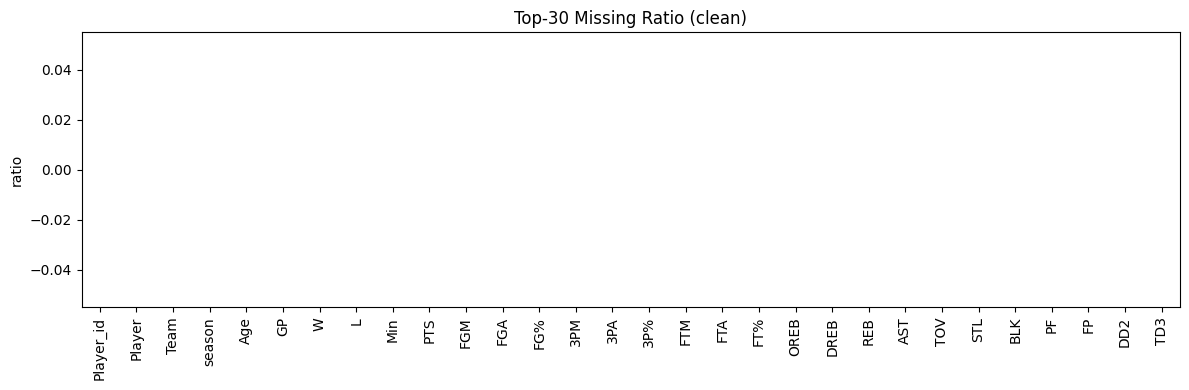

清洗后最大缺失比例： 0.0


Player_id    0.0
Player       0.0
Team         0.0
season       0.0
Age          0.0
GP           0.0
W            0.0
L            0.0
Min          0.0
PTS          0.0
FGM          0.0
FGA          0.0
FG%          0.0
3PM          0.0
3PA          0.0
3P%          0.0
FTM          0.0
FTA          0.0
FT%          0.0
OREB         0.0
DREB         0.0
REB          0.0
AST          0.0
TOV          0.0
STL          0.0
BLK          0.0
PF           0.0
FP           0.0
DD2          0.0
TD3          0.0
dtype: float64

In [10]:
na_ratio = df.isna().mean().sort_values(ascending=False)
na_ratio.to_csv(OUT_DIR / "missing_ratio_clean.csv")

topn = na_ratio.head(30)
ax = topn.plot(kind="bar", figsize=(12,4), title="Top-30 Missing Ratio (clean)")
ax.set_ylabel("ratio")
plt.tight_layout(); plt.show()

print("清洗后最大缺失比例：", float(na_ratio.max()))
display(topn)

In [11]:
if set(["Player_id","season"]).issubset(df.columns):
    dup_cnt = int(df.duplicated(subset=["Player_id","season"]).sum())
    print("复合键 (Player_id, season) 的重复行数：", dup_cnt)
    if dup_cnt > 0:
        display(df[df.duplicated(subset=["Player_id","season"], keep=False)]
                .sort_values(["Player_id","season"]).head(10))
else:
    print("缺少 Player_id 或 season，无法做键唯一性检查。")

复合键 (Player_id, season) 的重复行数： 0


质量复检： {'Min<=0 count': 0, 'GP<=0 count': 0}


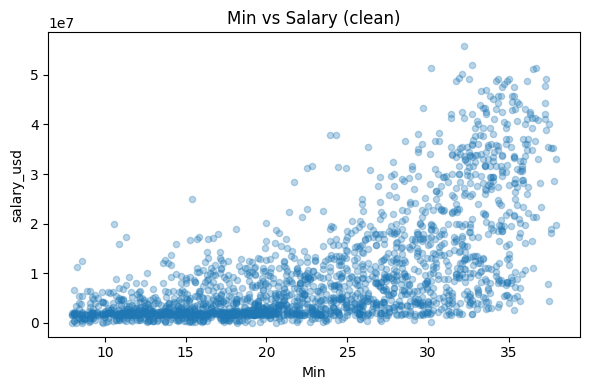

In [12]:
issues = {}
if "Min" in df.columns:
    issues["Min<=0 count"] = int((df["Min"]<=0).sum())
if "GP" in df.columns:
    issues["GP<=0 count"]  = int((df["GP"]<=0).sum())
print("质量复检：", issues)

if set(["Min","salary_usd"]).issubset(df.columns):
    df.plot(kind="scatter", x="Min", y="salary_usd", alpha=0.3, figsize=(6,4), title="Min vs Salary (clean)")
    plt.tight_layout(); plt.show()

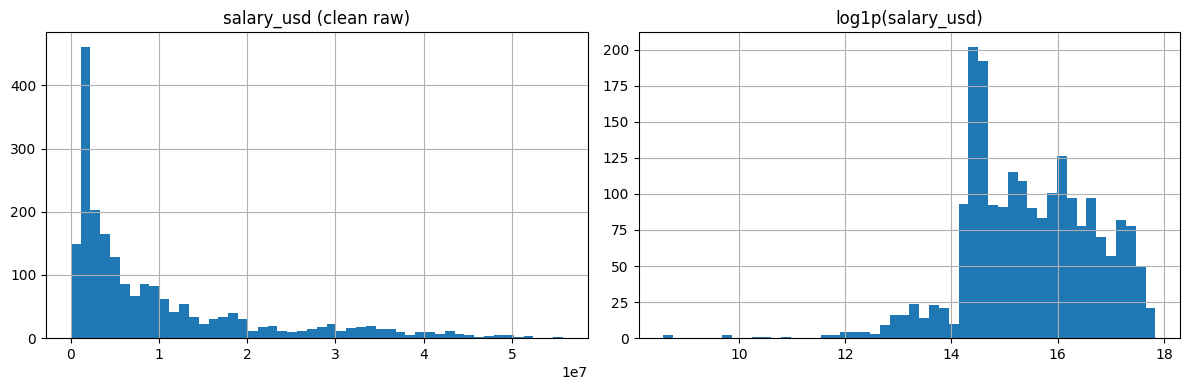

count    2.082000e+03
mean     9.794686e+06
std      1.104683e+07
min      5.318000e+03
10%      1.563518e+06
25%      2.068909e+06
50%      5.000000e+06
75%      1.296000e+07
90%      2.810354e+07
95%      3.534402e+07
99%      4.596348e+07
max      5.576122e+07
Name: salary_usd, dtype: float64

In [13]:
assert "salary_usd" in df.columns, "缺少 salary_usd"

fig, axes = plt.subplots(1,2, figsize=(12,4))
df["salary_usd"].dropna().hist(bins=50, ax=axes[0])
axes[0].set_title("salary_usd (clean raw)")

np.log1p(df["salary_usd"].clip(lower=0)).dropna().hist(bins=50, ax=axes[1])
axes[1].set_title("log1p(salary_usd)")
plt.tight_layout(); plt.show()

display(df["salary_usd"].describe(percentiles=[.1,.25,.5,.75,.9,.95,.99]))

清洗后每个赛季的样本数：


season
2020    408
2021    422
2022    418
2023    411
2024    423
Name: count, dtype: int64

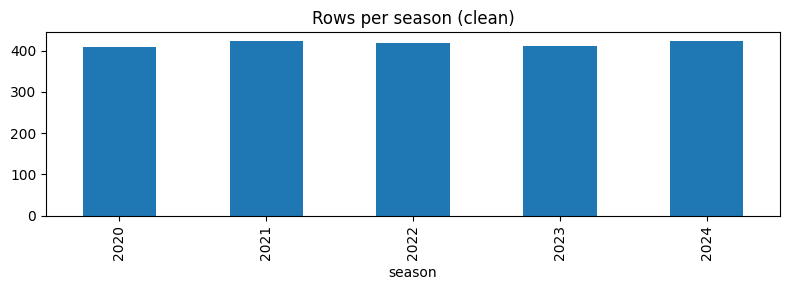

清洗后球队样本 Top 15：


Team
PHI    77
DET    76
TOR    74
SAS    73
BKN    72
DAL    72
OKC    72
LAC    71
MIA    71
CHA    71
MEM    71
POR    71
PHX    71
WAS    70
CHI    70
Name: count, dtype: int64

In [14]:
if "season" in df.columns:
    vc_season = df["season"].value_counts().sort_index()
    print("清洗后每个赛季的样本数：")
    display(vc_season)
    vc_season.plot(kind="bar", figsize=(8,3), title="Rows per season (clean)")
    plt.tight_layout(); plt.show()

if "Team" in df.columns:
    vc_team = df["Team"].value_counts()
    print("清洗后球队样本 Top 15：")
    display(vc_team.head(15))

In [15]:
num = df.select_dtypes(include="number").copy()
num_wo_target = num.drop(columns=[c for c in ["salary_usd"] if c in num.columns], errors="ignore")

corr = num_wo_target.corrwith(num["salary_usd"]).sort_values(ascending=False)
corr_df = pd.DataFrame({"feature": corr.index, "corr_with_salary": corr.values})
corr_df.to_csv(OUT_DIR / "corr_with_salary_clean.csv", index=False)

print("与 salary 正相关 Top 15")
display(corr_df.head(15))

print("与 salary 负相关 Top 15")
display(corr_df.tail(15))

与 salary 正相关 Top 15


,feature,corr_with_salary
0,FP,0.726206
1,PTS,0.722465
2,FGM,0.713390
3,FGA,0.692322
4,FTM,0.662823
5,FTA,0.647717
6,Min,0.641671
7,TOV,0.623317
8,AST,0.587395
9,DREB,0.524406


与 salary 负相关 Top 15


,feature,corr_with_salary
14,REB,0.449505
15,PF,0.339211
16,Age,0.334063
17,+/-,0.332180
18,TD3,0.287209
19,W,0.249648
20,BLK,0.231144
21,FT%,0.225183
22,GP,0.183503
23,OREB,0.168753


In [16]:
from scipy.stats import zscore

extreme_stats = []
for c in num_wo_target.columns:
    s = num_wo_target[c].dropna().astype(float)
    if len(s) < 50: 
        continue
    z = zscore(s)
    extreme = int((np.abs(z) > 3).sum())
    extreme_stats.append((c, extreme, int(len(s))))

extreme_df = pd.DataFrame(extreme_stats, columns=["feature", "extreme_count(|z|>3)", "non_null"])
extreme_df = extreme_df.sort_values("extreme_count(|z|>3)", ascending=False)
display(extreme_df.head(20))
extreme_df.to_csv(OUT_DIR / "extreme_value_counts_clean.csv", index=False)


,feature,extreme_count(|z|>3),non_null
26,DD2,66,2082
14,FTM,44,2082
17,OREB,40,2082
23,BLK,37,2082
15,FTA,36,2082
18,DREB,33,2082
19,REB,33,2082
20,AST,33,2082
10,FG%,29,2082
27,TD3,26,2082


In [17]:
summary = []

# 1) 形状变化
summary.append(f"形状：{df.shape}")

# 2) 缺失情况
summary.append(f"最大缺失比例：{na_ratio.max():.3f}")
bad_cols = list(na_ratio[na_ratio > 0.5].index)
summary.append(f"缺失>50%的列（清洗后）：{bad_cols if bad_cols else '无'}")

# 3) 主键重复
if set(["Player_id","season"]).issubset(df.columns):
    dup_cnt = int(df.duplicated(subset=["Player_id","season"]).sum())
    summary.append(f"(Player_id, season) 重复行数：{dup_cnt}")

# 4) Min/GP 问题
if "Min" in df.columns:
    summary.append(f"Min<=0 数量：{int((df['Min']<=0).sum())}")
if "GP" in df.columns:
    summary.append(f"GP<=0 数量：{int((df['GP']<=0).sum())}")

# 5) 目标分布
desc = df["salary_usd"].describe(percentiles=[.1,.25,.5,.75,.9,.95,.99])
summary.append(f"salary 中位数(50%)：{desc['50%']:.0f}，均值：{desc['mean']:.0f}（仍偏态，log1p更稳）")

print("🧾 清洗后 EDA 小结：")
for i, s in enumerate(summary, 1):
    print(f"{i}. {s}")

# 同步保存
(Path(OUT_DIR) / "eda2_summary.txt").write_text("\n".join(summary), encoding="utf-8")
print("\n✅ 已保存：", Path(OUT_DIR) / "eda2_summary.txt")


🧾 清洗后 EDA 小结：
1. 形状：(2082, 32)
2. 最大缺失比例：0.000
3. 缺失>50%的列（清洗后）：无
4. (Player_id, season) 重复行数：0
5. Min<=0 数量：0
6. GP<=0 数量：0
7. salary 中位数(50%)：5000000，均值：9794686（仍偏态，log1p更稳）

✅ 已保存： reports\eda_2_clean\eda2_summary.txt
